In [1]:
import numpy as np
data = np.load('ct_data.npz')
X_train = data['X_train']; X_val = data['X_val']; X_test = data['X_test']
y_train = data['y_train']; y_val = data['y_val']; y_test = data['y_test']

In [17]:
import matplotlib.pyplot as plt

## Question 1

### a

In [14]:
np.mean(y_train)

-9.13868774539957e-15

In [19]:
mean_y_val = np.mean(y_val)

In [15]:
std_err_y_val = np.std(y_val)/np.sqrt(len(y_val))

In [ ]:
print('The mean is:', mean_y_val)

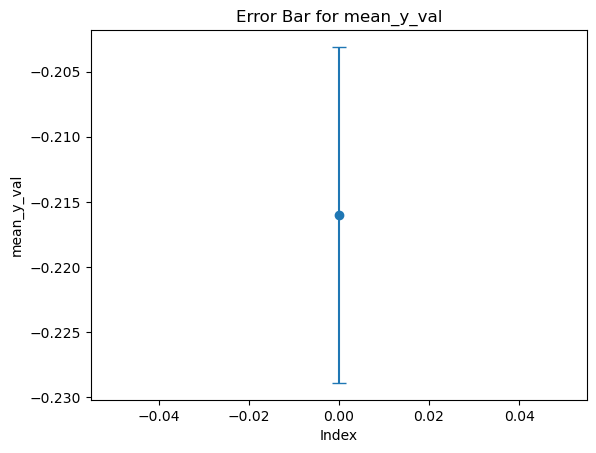

In [20]:
# Plotting the error bar
plt.errorbar(x=[0], y=[mean_y_val], yerr=[std_err_y_val], fmt='o', capsize=5)
plt.title('Error Bar for mean_y_val')
plt.xlabel('Index')
plt.ylabel('mean_y_val')
plt.show()

In [45]:
mean_y_train_first_5785 = np.mean(y_train[:5785])

In [46]:
mean_y_train_first_5785

-0.44247687859693674

In [43]:
np.mean(y_train[-5785:])

-0.02834598126374623

In [48]:
std_err_y_train_first_5785 = np.std(y_train[:-5785])/np.sqrt(5785)

In [29]:
std_err_y_train

0.01192627246273395

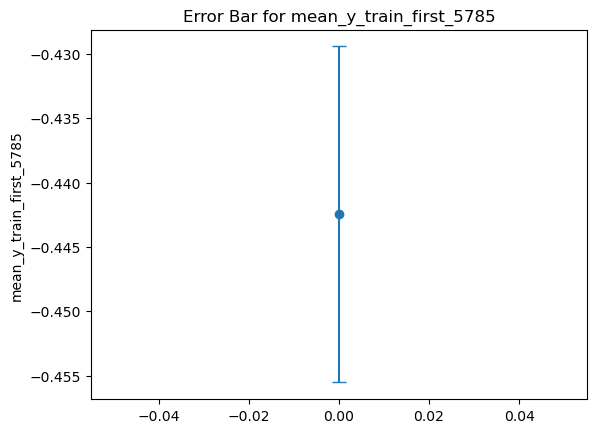

In [49]:
plt.errorbar(x=[0], y=[mean_y_train_first_5785], yerr=[std_err_y_train_first_5785], fmt='o', capsize=5)
plt.title('Error Bar for mean_y_train_first_5785')
plt.ylabel('mean_y_train_first_5785')
plt.show()


### b

In [52]:
# Find columns in X_train that have the same value for every row
constant_columns = np.all(X_train == X_train[0, :], axis=0) # np.all() returns True if all elements in the array are True. axis = 0 means the logical AND operation is applied over rows
constant_columns_indices = np.where(constant_columns)[0]

5

In [60]:
X_train = np.delete(X_train, constant_columns_indices, axis=1)

In [62]:
X_val = np.delete(X_val, constant_columns_indices, axis=1)
X_test = np.delete(X_test, constant_columns_indices, axis=1)

In [54]:
test = X_train == X_train[0, :]

In [63]:
# Find unique columns in X_train
_, unique_indices = np.unique(X_train, axis=1, return_index=True)

In [65]:
print(len(unique_indices))

373


In [66]:

# Sort the indices to maintain the original order
unique_indices.sort()

# Select only the unique columns
X_train_unique = X_train[:, unique_indices]

# Update X_val and X_test to have the same columns as X_train_unique
X_val_unique = X_val[:, unique_indices]
X_test_unique = X_test[:, unique_indices]

# Assign the unique columns back to the original variables if needed
X_train = X_train_unique
X_val = X_val_unique
X_test = X_test_unique

In [69]:
X_val.shape

(5785, 373)

## Question 2